## **Enegy Consumption Prediction Model**

### **Prepared By: Chandan Chaudhari**

In [31]:
# Import Data Manipulation Libraries
import pandas as pd
import numpy as np
# Import Data Visualization Libaries
import matplotlib.pyplot as plt
import seaborn as sns
# Import Neccessory Libraries
# 1. Importing Filter Warning Libraries
import warnings
warnings.filterwarnings(action  = 'ignore')
# 2. Importing Data Logging Libraries
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    filemode = 'w',
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    force = True)
# 3. Import OrderedDict()
from collections import OrderedDict


In [32]:
# Step1: Data Ingestion

def data_ingestion():
  return pd.read_csv('/content/train_energy_data.csv')

# Step2:  Checking Descriptive Stats:
# (numerical_stats,categorical_stats,data_info)

def descriptive_stats():

  # Segregate Numerical columns and Categorical columns

  numerical_col = df.select_dtypes(exclude = "object").columns
  categorical_col = df.select_dtypes(include = "object").columns

  # Checking Stats: Numerical Columns
  num_stats = []
  cat_stats = []
  data_info = []

  for i in numerical_col:

    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    LWR = Q1 - 1.5*IQR
    UWR = Q3 + 1.5*IQR

    outlier_count = len(df[(df[i] < LWR) | (df[i] > UWR)])
    outlier_percentage = (outlier_count / len(df)) * 100

    numericalstats = OrderedDict({
        "Feature":i,
        "Mean":df[i].mean(),
        "Median":df[i].median(),
        "Minimum":df[i].min(),
        "Maximum":df[i].max(),
        "Q1":Q1,
        "Q3":Q3,
        "IQR":IQR,
        "LWR":LWR,
        "UWR":UWR,
        "Outlier Count":outlier_count,
        "Outlier Percentage":outlier_percentage,
        "Standard Deviation":df[i].std(),
        "Variance":df[i].var(),
        "Skewness":df[i].skew(),
        "Kurtosis":df[i].kurtosis()
        })
    num_stats.append(numericalstats)
    numerical_stats_report = pd.DataFrame(num_stats)

  # Checking for Categorical columns
  for i in categorical_col:
    cat_stats1 = OrderedDict({
        "Feature":i,
        "Unique Values":df[i].nunique(),
        "Value Counts":df[i].value_counts().to_dict(),
        "Mode":df[i].mode()[0]
    })
    cat_stats.append(cat_stats1)
    categorical_stats_report = pd.DataFrame(cat_stats)

  # Checking datasetinformation
  for i in df.columns:
    data_info1 = OrderedDict({
        "Feature":i,
        "Data Type":df[i].dtype,
        "Missing_Values":df[i].isnull().sum(),
        "Unique_Values":df[i].nunique(),
        "Value_Counts":df[i].value_counts().to_dict()
        })
    data_info.append(data_info1)
    data_info_report = pd.DataFrame(data_info)

  return numerical_stats_report,categorical_stats_report,data_info_report


### Data Insights:

1. The given dataset is non normal distributed.

2. There are no outliers present.

3. Energy Consumption is a target column


### Machine Learning WorkFlow:

1. Data Ingestion

2. Data Exploration : EDA and Descriptive Stats

3. Split the Dataset into Independent columns and Dependent columns i.e X and y

4. Split the Dataset into train and test

5. Use Encoding Technique to convert all categorical columns into numerical columns

6. Use Scaling Technique: Normalization Technique

7. Apply Machine Learning Model and Evaluate/Model Validation

8. Model Deployment

In [33]:
# Split the Dataset into Independent columns and Dependent columns i.e X and y

def data_preprocessing(df):

  X = df.drop(columns = 'Energy Consumption',axis = 1)
  y = df['Energy Consumption']

  # Split the Dataset into train and test

  from sklearn.model_selection import train_test_split

  X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                  test_size = 0.3,
                                                  random_state = 10)

  # Use Encoding Technique to convert all categorical columns into numerical columns

  # Note: Train data is always fit_transform() and Test always transform()

  categorical_col = X.select_dtypes(include = 'object').columns

  from sklearn.preprocessing import LabelEncoder
  for i in categorical_col:
    le = LabelEncoder()
    X_train[i] = le.fit_transform(X_train[i])  # Seen Data
    X_test[i] = le.transform(X_test[i])        # Unseen Data

  # Using Normalization Technique
  from sklearn.preprocessing import MinMaxScaler
  sc = MinMaxScaler()
  X_train = sc.fit_transform(X_train)          # Seen Data
  X_test = sc.transform(X_test)                # Unseen Data

  return X_train,X_test,y_train,y_test

In [34]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,RANSACRegressor,HuberRegressor

def model_building(df):
  models = {
      "LinearRegression":LinearRegression(),
      "Ridge":Ridge(),
      "Lasso":Lasso(),
      "ElasticNet":ElasticNet(),
      "RANSACRegressor":RANSACRegressor(),
      "HuberRegressor":HuberRegressor()
  }

  LinearRegression_Models = []

  for model_name,model in models.items():
    # fit the data on train: Seen Data
    model.fit(X_train,y_train)
    # prediction value based on test data: Unseen Data
    y_pred = model.predict(X_test)

    # Evaluating Metrics
    r2_score_model = r2_score(y_test,y_pred)
    mse_model = mean_squared_error(y_test,y_pred)
    mae_model = mean_absolute_error(y_test,y_pred)

    LinearRegression_Models.append({
        "Model Name":model_name,
        "R2 Score":r2_score_model,
        "MSE":mse_model,
        "MAE":mae_model
    })

    LinearRegression_Model_Report = pd.DataFrame(LinearRegression_Models)

  return LinearRegression_Model_Report


In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression

# Step1: Data Ingestion
df = data_ingestion()

# Step2: Checking Descriptive Stats
num_stats,cat_stats,data_info = descriptive_stats()

# Step3: Data Preprocessing

X_train,X_test,y_train,y_test = data_preprocessing(df)

# Step4: Model Building
LinearRegression_Model_Report = model_building(df)

In [36]:
LinearRegression_Model_Report

,Model Name,R2 Score,MSE,MAE
0,LinearRegression,0.837408,131537.623817,333.209091
1,Ridge,0.837765,131248.677532,332.918095
2,Lasso,0.837685,131313.370895,332.943503
3,ElasticNet,0.230422,622590.348976,644.338633
4,RANSACRegressor,0.800823,161134.590306,322.658561
5,HuberRegressor,0.752018,200617.848737,267.504602


## Linear Regression

$$
\hat{y}_i = \beta_0 + \sum_{j=1}^{p} x_{ij}\beta_j
$$


## Assumptions of Linear Regression

- Linearity: Relationship between features and target is linear.

- Independence: Observations (errors) are independent of each other.

- Homoscedasticity: Constant variance of errors (no pattern in residuals).

- Normality of Errors: Residuals follow a normal distribution (important for inference).

- No Multicollinearity: Independent variables are not highly correlated with each other.

- No Autocorrelation (mainly for time-series): Residuals are not correlated across time.

In [37]:
# Linear Regression:

'''
Logic:
y = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6 + w7
With the help of Linear Regression our aim is to compute coefficient values of
w1,w2,w3,w4,w5,w6,w7...
'''
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression

# Fit the LinearRegression Model on Train Dataset i.e. Seen Data
Linear_Regression = LinearRegression().fit(X_train,y_train)

# Predict the Model on Unseen Data
y_pred = Linear_Regression.predict(X_test)

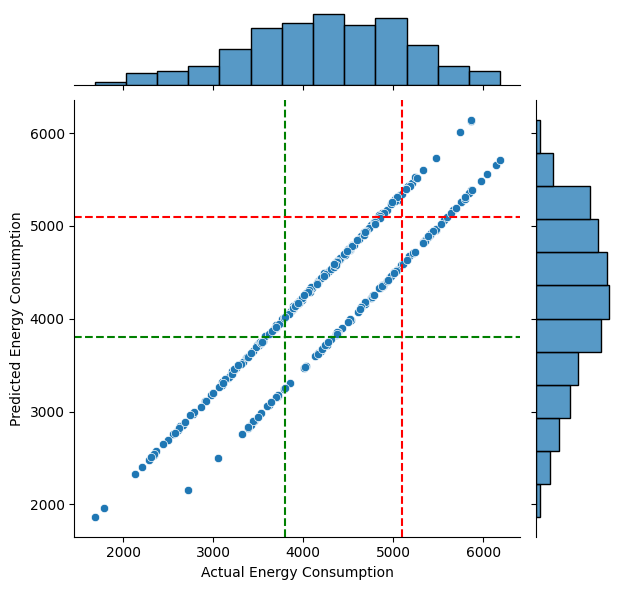

In [38]:
# Understanding model performance
sns.jointplot(x = y_test,y = y_pred)
plt.axvline(3800,color = 'green',linestyle = '--')
plt.axvline(5100,color = 'red',linestyle = '--')
plt.axhline(3800,color = 'green',linestyle = '--')
plt.axhline(5100,color = 'red',linestyle = '--')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.show()

In [39]:
# Model Score Calculation Using R2Score:
model_score_linear_regression = r2_score(y_test,y_pred)
model_score_linear_regression

0.8374076588854513

In [40]:
# Mean Squared Error Calculation
mse_linear_regression = mean_squared_error(y_test,y_pred)
mse_linear_regression

131537.62381739233

In [41]:
# Mean Absolute Error Calculation
mae_linear_regression = mean_absolute_error(y_test,y_pred)
mae_linear_regression

333.20909099203806

In [42]:
# Calculation of Coefficients (W1,W2,W3,W4,W5,W6)
Linear_Regression.coef_

array([-495.16918854, 2531.30635326, 1008.09513675,  995.13363656,
       -111.25289057,  -58.74697766])

In [43]:
# Calculation of Intercept (W7)
Linear_Regression.intercept_

np.float64(2216.9746184178925)

# **Linear Regression Modeling**

## Lasso() Regression:

$$
\min_{\beta} \left( \sum_{i=1}^{n} \left(y_i - \beta_0 - \sum_{j=1}^{p} x_{ij}\beta_j\right)^2
+ \lambda \sum_{j=1}^{p} |\beta_j| \right)
$$


## Ridge Regression

$$
\min_{\beta} \left( \sum_{i=1}^{n} \left(y_i - \beta_0 - \sum_{j=1}^{p} x_{ij}\beta_j\right)^2
+ \lambda \sum_{j=1}^{p} \beta_j^2 \right)
$$


## ElastiNet Regression

$$
\min_{\beta} \left(
\sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} x_{ij}\beta_j \right)^2
+ \lambda_1 \sum_{j=1}^{p} |\beta_j|
+ \lambda_2 \sum_{j=1}^{p} \beta_j^2
\right)
$$


## Huber Regressor

$$
L_{\delta}(r) =
\begin{cases}
\frac{1}{2} r^2, & \text{if } |r| \le \delta \\
\delta \left(|r| - \frac{1}{2}\delta \right), & \text{if } |r| > \delta
\end{cases}
$$


## Ransac Regressor

$$
\max_{\beta} \ \left|
\left\{ i :
\left| y_i - \beta_0 - \sum_{j=1}^{p} x_{ij}\beta_j \right| < \epsilon
\right\}
\right|
$$


## Polynomial Regression

In [44]:
from sklearn.linear_model import Lasso,Ridge,HuberRegressor,RANSACRegressor

# Lasso()
Lasso = Lasso().fit(X_train,y_train)
y_pred_lasso = Lasso.predict(X_test)
r2_score_lasso = r2_score(y_test,y_pred_lasso)
mse_lasso = mean_squared_error(y_test,y_pred_lasso)
mae_lasso = mean_absolute_error(y_test,y_pred_lasso)

r2_score_lasso,mse_lasso,mae_lasso

(0.837684855679933, 131313.3708948624, 332.94350308739376)

In [45]:
# Ridge()
Ridge = Ridge().fit(X_train,y_train)
y_pred_ridge = Ridge.predict(X_test)
r2_score_ridge = r2_score(y_test,y_pred_ridge)
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
mae_ridge = mean_absolute_error(y_test,y_pred_ridge)

r2_score_ridge,mse_ridge,mae_ridge

(0.8377648224988226, 131248.67753188557, 332.918094924772)

In [46]:
# ElasticNet
from sklearn.linear_model import ElasticNet

Elastic_Net = ElasticNet().fit(X_train,y_train)
y_pred_elasticnet = Elastic_Net.predict(X_test)

r2_score_elasticnet = r2_score(y_test,y_pred_elasticnet)
mse_elasticnet = mean_squared_error(y_test,y_pred_elasticnet)
mae_elasticnet = mean_absolute_error(y_test,y_pred_elasticnet)

r2_score_elasticnet,mse_elasticnet,mae_elasticnet

(0.23042229700155537, 622590.3489755731, 644.3386331870978)

In [47]:
# HuberRegressor
Huber = HuberRegressor().fit(X_train,y_train)
y_pred_huber = Huber.predict(X_test)

r2_score_huber = r2_score(y_test,y_pred_huber)
mse_huber = mean_squared_error(y_test,y_pred_huber)
mae_huber = mean_absolute_error(y_test,y_pred_huber)

r2_score_huber,mse_huber,mae_huber

(0.7520182838269222, 200617.8487373225, 267.50460223575743)

In [48]:
# RansacRegressor
Ransac = RANSACRegressor().fit(X_train,y_train)
y_pred_ransac = Ransac.predict(X_test)

r2_score_ransac = r2_score(y_test,y_pred_ransac)
mse_ransac = mean_squared_error(y_test,y_pred_ransac)
mae_ransac = mean_absolute_error(y_test,y_pred_ransac)

r2_score_ransac,mse_ransac,mae_ransac

(0.7994649460326027, 162233.3764933021, 343.97255168413085)

## **Tree Based Algorithms**

In [49]:
# Using DecisionTree Regressor

from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor(criterion='squared_error',
                           min_samples_split = 2,
                           max_depth = None).fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

r2_score_DT = r2_score(y_test,y_pred_DT)
mse_DT = mean_squared_error(y_test,y_pred_DT)
mae_Dt = mean_absolute_error(y_test,y_pred_DT)

r2_score_DT,mse_DT,mae_Dt

(0.9315234061121294, 55397.74127966667, 191.26810000000003)

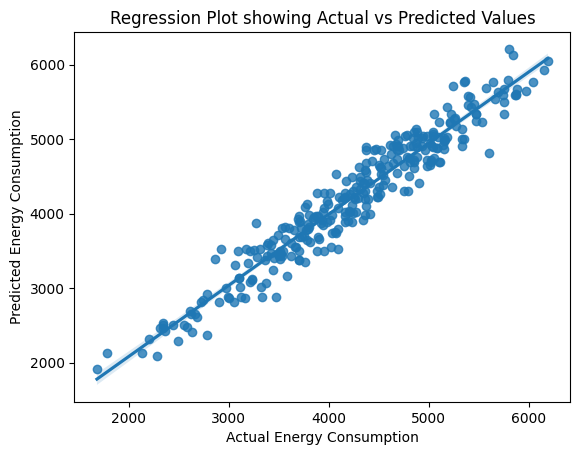

In [50]:
sns.regplot(x = y_test,y = y_pred_DT)
plt.title('Regression Plot showing Actual vs Predicted Values')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.show()

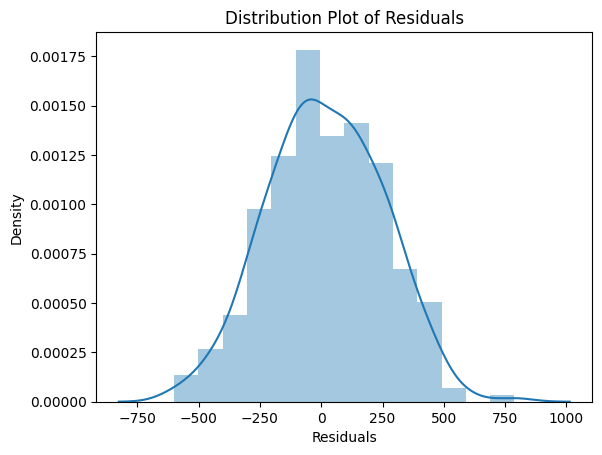

In [51]:
# Checking Model Performance: With DecisionTreeRegressor
sns.distplot(y_test - y_pred_DT)
plt.title('Distribution Plot of Residuals')
plt.xlabel('Residuals')
plt.show()

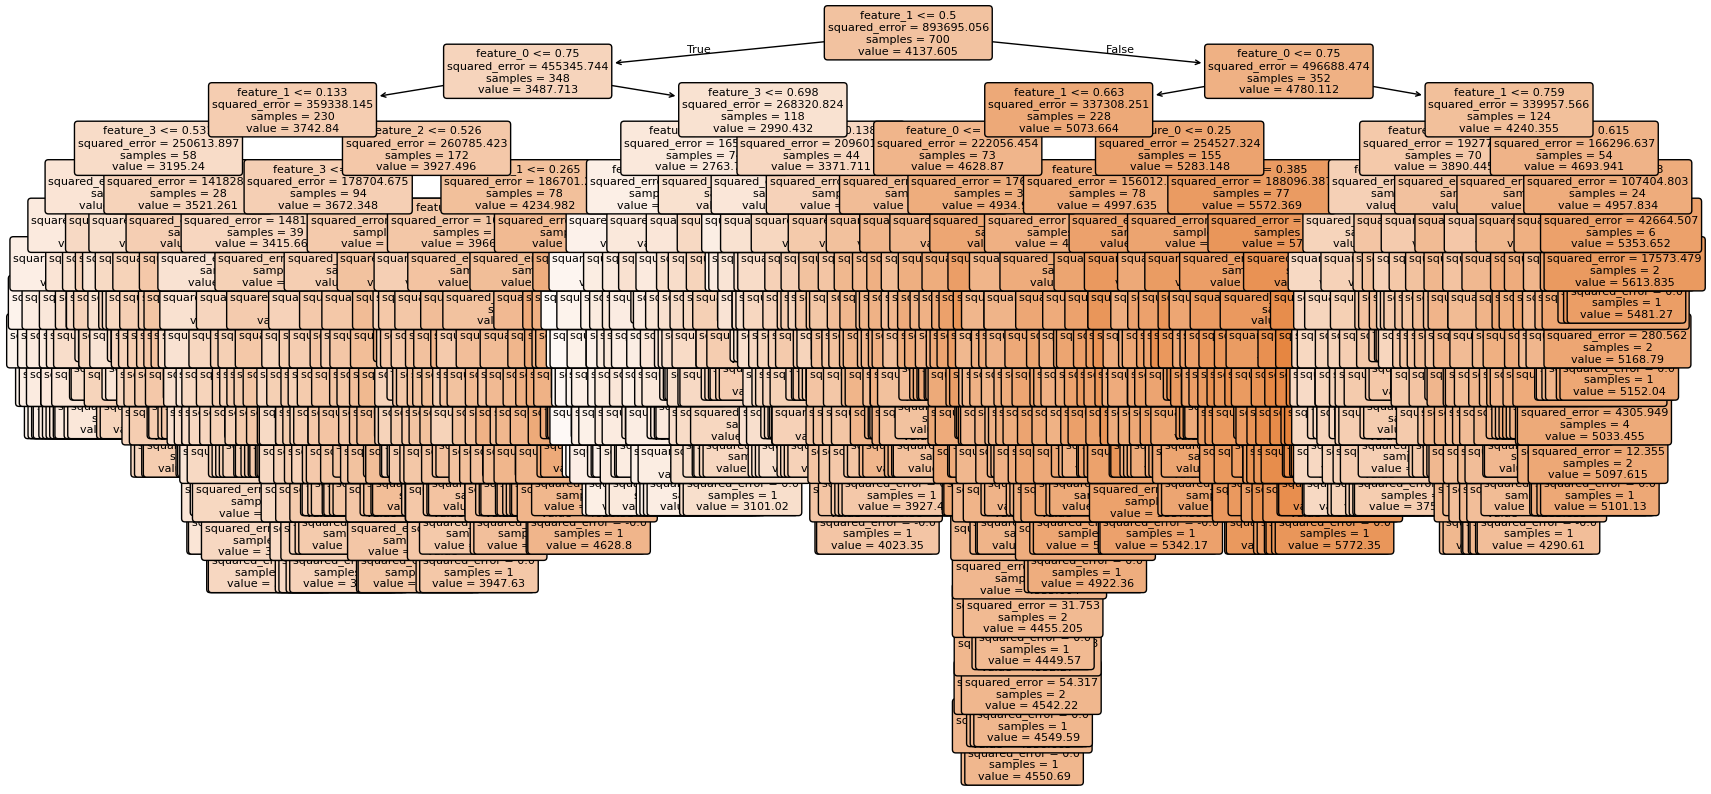

In [52]:
# Checking Decision Tree Structure

from sklearn.tree import DecisionTreeRegressor, plot_tree

feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]

plt.figure(figsize=(20,10))
plot_tree(DT, feature_names=feature_names, filled=True, rounded=True, fontsize=8)
plt.show()

In [54]:
# Using RandomTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators = 1000).fit(X_train,y_train)
y_pred_rf = RF.predict(X_test)

r2score_rf = r2_score(y_test,y_pred_rf)
mse_rf = mean_squared_error(y_test,y_pred_rf)
mae_rf = mean_absolute_error(y_test,y_pred_rf)

r2score_rf,mse_rf,mae_rf

(0.9763891274607717, 19101.256853650913, 107.98361519999852)

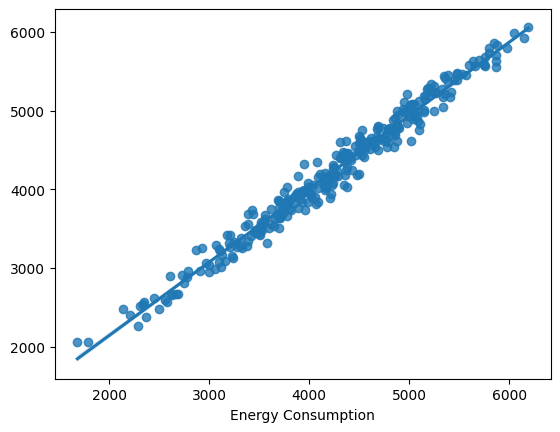

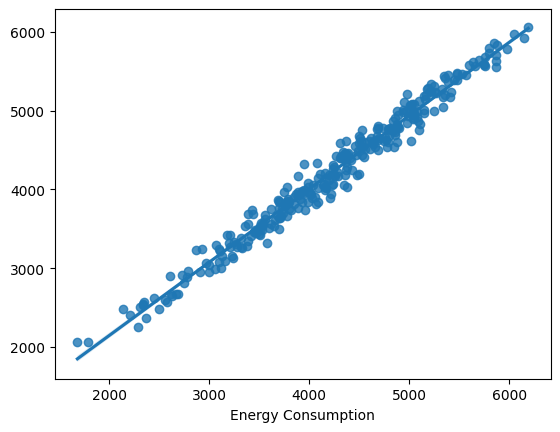

In [30]:
# Model Performance of RandomForestRegressor

sns.regplot(x = y_test,y = y_pred_rf)
plt.show()

### Note:

1. Tree based algorithms are selected based on following conditions

- The Data Patterns are Non Linear in Nature

- When Datapoints are Non Normal Distributed

- When Model Overfits ---> In Such cases Use RandomForestRegressor

(Because it is an ensemble technique...)

2. If the Model Accuracy i.e. r2 score shows overfitting issues then increase n_estimators to higher value. By default n_esimators = 100 (100 Decision trees combine together to form one random forest model)

3. Higher the n_estimators more will be the computation time.


## **Boosting Algorithms**

In [57]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

ada = AdaBoostRegressor().fit(X_train,y_train)

y_pred_ada = ada.predict(X_test)

r2score_ada = r2_score(y_test,y_pred_ada)
mse_ada = mean_squared_error(y_test,y_pred_ada)
mae_ada = mean_absolute_error(y_test,y_pred_ada)

r2score_ada,mse_ada,mae_ada

(0.8913491408216735, 87898.82564004954, 240.67258798668186)

In [59]:
gradient = GradientBoostingRegressor().fit(X_train,y_train)

y_pred_grad = gradient.predict(X_test)

r2score_grad = r2_score(y_test,y_pred_grad)
mse_grad = mean_squared_error(y_test,y_pred_grad)
mae_grad = mean_absolute_error(y_test,y_pred_grad)

r2score_grad,mse_grad,mae_grad

(0.9890959910563963, 8821.371392363048, 74.19272000172992)

In [62]:
from xgboost import XGBRegressor

xgb = XGBRegressor().fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

r2score_xgb = r2_score(y_test,y_pred_xgb)
mse_xgb = mean_squared_error(y_test,y_pred_xgb)
mae_xgb = mean_absolute_error(y_test,y_pred_xgb)

r2score_xgb,mse_xgb,mae_xgb

(0.9809893305460105, 15379.680678771623, 98.07354085286455)

## **Support Vector Regressor**

In [65]:
from sklearn.svm import SVR

SVR = SVR().fit(X_train,y_train)

y_pred_svr = SVR.predict(X_test)

r2score_svr = r2_score(y_test,y_pred_svr)
mse_svr = mean_squared_error(y_test,y_pred_svr)
mae_svr = mean_absolute_error(y_test,y_pred_svr)

r2score_svr,mse_svr,mae_svr

(0.03000782157609516, 784726.1771170829, 723.6526401047358)